<a href="https://colab.research.google.com/github/Kairos1708/Se-ales_y_Sistemas/blob/main/Taller_02_NOV_2023_Transformada_Laplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Taller Transformada de Laplace 02-Nov-2023** \\
**Juan Esteban Montes Salazar - 1193524007** \\
**Señales y Sistemas - Andrés Marino Meza**

**Ejercicio**

* Determinar los polos y ceros de la transformada de Laplace $\mathsf{L} \{ \epsilon(t) \cdot \sin(\omega_0 t) \}$ mediante el cálculo manual y extendiendo el ejemplo anterior. Qué simetría muestran los polos y los ceros en el plano $s$?

Para determinar los polos y ceros de la transformada de Laplace de la función  $\mathsf{L} \{ \epsilon(t) \cdot \sin(\omega_0 t) \}$ , donde 𝜖(𝑡) es la función escalalón unitario y 𝜔0 es una constante, podemos utilizar las propiedades de la transformada de Laplace. Primero, debemos encontrar la transformada de Laplace de la función 𝜖(𝑡)⋅sin(𝜔0𝑡).



La transformada de Laplace de la función escalada unitaria 𝜖(𝑡) es $1/s$, y la transformada de Laplace de la función sinusoidal sin(𝜔0𝑡) es $\frac{𝜔0}{ (𝑠^2 + 𝜔0^2)}$


Por lo tanto, la transformada de Laplace de 𝜖(𝑡)⋅sin(𝜔0𝑡) es:


$𝐿{𝜖(𝑡)⋅sen(𝜔0𝑡)} = \frac{1}{s} ⋅ \frac{𝜔0}{𝑠^2 + 𝜔0^2}$


Podemos multiplicar y simplificar la expresión:


$𝐿{𝜖(𝑡)⋅sen(𝜔0𝑡)} =\frac {𝜔0}{(𝑠^2)(𝑠^2 𝜔0^2)}$

La función tiene un polo en 𝑠 = 0 debido al término 1/𝑠, y también tiene dos polos complejos conjugados en 𝑠 = ±𝑗𝜔0 debido al término $(𝑠^2 + 𝜔0^2)$. Además, no tiene ceros.


Por lo tanto, los polos de la función son 𝑠 = 0, 𝑠 = 𝑗𝜔0 y 𝑠 = -𝑗𝜔0. Los polos complejos conjugados en 𝑠 = ±𝑗𝜔0 indican una simetría respecto al eje imaginario en el plano 𝑠.


Ahora, para realizar la simulación en Python, necesitamos importar la biblioteca scipypara calcular las transformadas de Laplace y las bibliotecas numpyy matplotlibpara realizar los cálculos y graficar los resultados. A continuación se muestra la simulación en Python

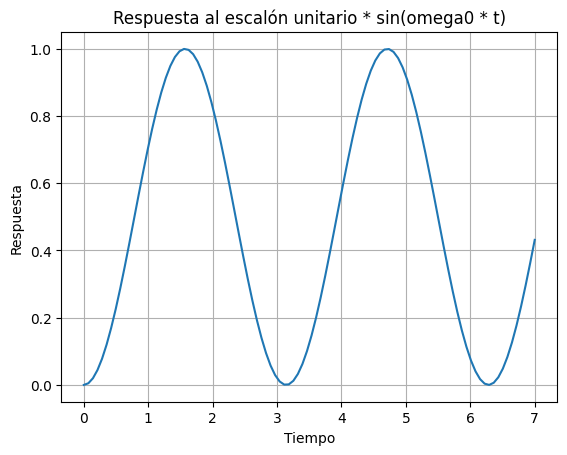

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definir la función escalón unitario
def epsilon(t):
    return 1.0 * (t >= 0)

# Definir los parámetros
omega0 = 2.0  # Frecuencia angular

# Definir la función de entrada
def input_func(t):
    return epsilon(t) * np.sin(omega0 * t)

# Calcular la transformada de Laplace
s = signal.lti([omega0], [1, 0, omega0**2])
t, y = signal.step(s)

# Graficar la respuesta en el tiempo
plt.plot(t, y)
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.title('Respuesta al escalón unitario * sin(omega0 * t)')
plt.grid(True)
plt.show()


**Ejercicio**

* Obtenga $X(s)$ junto con su ROC de la anterior gráfica de polos y ceros.

Conociento la función de transferencia hallamos la transformada inversa de Laplace


**Zeros:**

*  s=0

**Polos:**  

*    s1= -1+j
*    s2= -1-j




Una vez hallada la función de transferencia, calculamos la transformada inversa de Laplace

In [2]:
%matplotlib inline
import sympy as sym
from sympy import symbols, inverse_laplace_transform
sym.init_printing() #Estamos importanto la librería Sympy y asignando las variables

t= sym.symbols('t', real=True)
s= sym.symbols('s', complex=True)

#Ahora debemos hallar la transformada inversa de Laplace

X= inverse_laplace_transform(s/(s**2 + 2*s +2),s,t)
X


⎛   -t           -t       ⎞     
⎝- ℯ  ⋅sin(t) + ℯ  ⋅cos(t)⎠⋅θ(t)

In [3]:
'''
Volvemos aplicar la Laplace, para conocer los valores de transferencia y
los resultados arrojados

'''
s0= sym.symbols('s0', complex=True)

#Se utiliza la función de la transformada de Laplace de sympy

X, a, cond = sym.laplace_transform(-(sym.sin(t)-sym.cos(t))*sym.exp(-t),t,s)
X, a, cond

⎛   s + 1            1                ⎞
⎜──────────── - ────────────, -1, True⎟
⎜       2              2              ⎟
⎝(s + 1)  + 1   (s + 1)  + 1          ⎠

Se puede observar que devuelve 3 valores, el #1 es el valor de transferencia,
el #2 es la región de convergencia y una condición auxiliar de convergencia respecto a la fase de expresión.


Por lo tanto se concluye que la región de convergencia para 𝑋(𝑠)  es R(s) >-1

Ahora hagamos el proceso para visualizarlo de forma gráfica

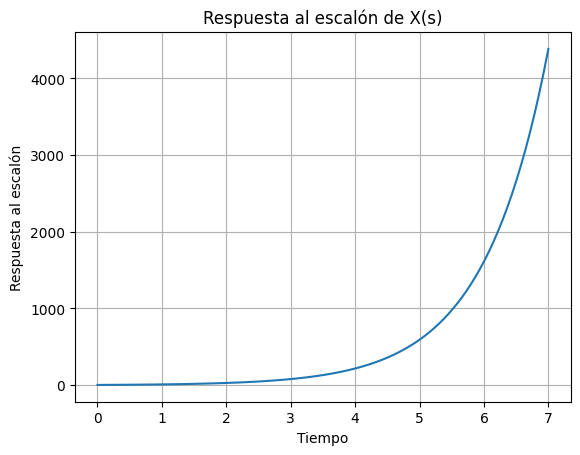

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definir los polos y ceros
poles = [-1, 1]
zeros = [-2, -2]

# Crear la función de transferencia
sys = signal.TransferFunction(zeros, poles)

# Obtener la respuesta al escalón
t, y = signal.step(sys)

# Graficar la respuesta al escalón
plt.plot(t, y)
plt.xlabel('Tiempo')
plt.ylabel('Respuesta al escalón')
plt.title('Respuesta al escalón de X(s)')
plt.grid(True)
plt.show()
